In [48]:
import matplotlib.pyplot as plt
from sksurv.linear_model import CoxPHSurvivalAnalysis
import numpy as np
from dataset_utils import load_dataset
from dataset_utils import preprocess_dataset

In [49]:
dataset = load_dataset("whas500")
X_train, X_test, Y_train, Y_test = preprocess_dataset(dataset)
X_train

,cat__afb_0,cat__afb_1,cat__av3_0,cat__av3_1,cat__chf_0,cat__chf_1,cat__cvd_0,cat__cvd_1,cat__gender_0,cat__gender_1,...,cat__mitype_0,cat__mitype_1,cat__sho_0,cat__sho_1,num__age,num__bmi,num__diasbp,num__hr,num__los,num__sysbp
453,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-0.738327,-0.280832,-0.654913,0.029262,1.957490,-1.512496
14,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,-0.192555,-0.054780,0.263924,0.242078,-0.442866,-0.206945
257,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,-1.011213,-0.285240,0.554083,-0.736876,-0.202830,-0.144776
168,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.012109,1.008520,0.360643,0.412331,-0.682901,0.103900
121,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.967210,-0.217333,1.521279,-1.077381,-0.202830,2.777171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.581204,-0.209446,-2.395866,-1.034818,0.037206,-1.357073
483,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,-1.215878,0.926586,1.037681,0.327205,-1.403008,-0.455622
472,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,-0.738327,-0.910642,-0.122955,-0.779439,-0.442866,-0.486706
138,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.216774,-0.217333,0.650802,-0.183554,0.517277,-0.331284


In [50]:
estimator = CoxPHSurvivalAnalysis(alpha=0.1).fit(X_train, Y_train.to_records(index=False))

/Users/jasonwang/miniforge3/envs/fair-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CoxPHSurvivalAnalysis was fitted with feature names
  warnings.warn(


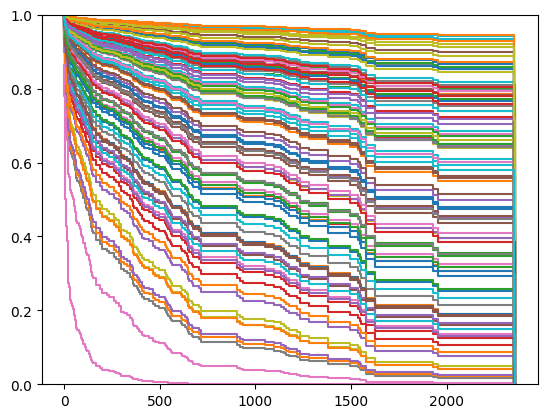

In [51]:
surv_funcs = estimator.predict_survival_function(np.array(X_test))
for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0, 1)
plt.show()

In [52]:
estimator.score(np.array(X_test), Y_test.to_records(index=False))

/Users/jasonwang/miniforge3/envs/fair-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CoxPHSurvivalAnalysis was fitted with feature names
  warnings.warn(


0.7513343799058084

In [53]:
from metrics import keya_individual_fairness
keya_individual_fairness(np.array(X_test),estimator.predict(np.array(X_test)))

/Users/jasonwang/miniforge3/envs/fair-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CoxPHSurvivalAnalysis was fitted with feature names
  warnings.warn(


78.91698841666938